Decision Tree

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("dt.csv")
df

CustomerID    Age  Gender  Income  Purchased
0           1  40-50    Male     Low          0
1           2  30-40  Female     Low          0
2           3  40-50    Male    High          1
3           4  30-40  Female  Medium          1
4           5  20-30  Female     Low          0
5           6  20-30    Male     Low          1
6           7  30-40  Female  Medium          1
7           8  30-40    Male    High          1
8           9  20-30    Male  Medium          1
9          10  40-50  Female     Low          0

In [6]:
x = df.drop(['CustomerID', 'Purchased'], axis = 'columns')
x

Age  Gender  Income
0  40-50    Male     Low
1  30-40  Female     Low
2  40-50    Male    High
3  30-40  Female  Medium
4  20-30  Female     Low
5  20-30    Male     Low
6  30-40  Female  Medium
7  30-40    Male    High
8  20-30    Male  Medium
9  40-50  Female     Low

In [7]:
y = df['Purchased']
y

0    0
1    0
2    1
3    1
4    0
5    1
6    1
7    1
8    1
9    0
Name: Purchased, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [9]:
x = x.apply(LabelEncoder().fit_transform)
x

Age  Gender  Income
0    2       1       1
1    1       0       1
2    2       1       0
3    1       0       2
4    0       0       1
5    0       1       1
6    1       0       2
7    1       1       0
8    0       1       2
9    2       0       1

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [11]:
len(x_train)

7

In [12]:
len(x_test)

3

In [13]:
x_test

Age  Gender  Income
0    2       1       1
2    2       1       0
9    2       0       1

In [15]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x, y)

DecisionTreeClassifier()

In [17]:
model.predict([[1, 1, 2]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [18]:
model.predict(x_test)

array([0, 1, 0], dtype=int64)

[Text(0.5, 0.9, 'X[2] <= 1.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.3333333333333333, 0.7, 'X[1] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5, 0.5, 'X[0] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.3, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

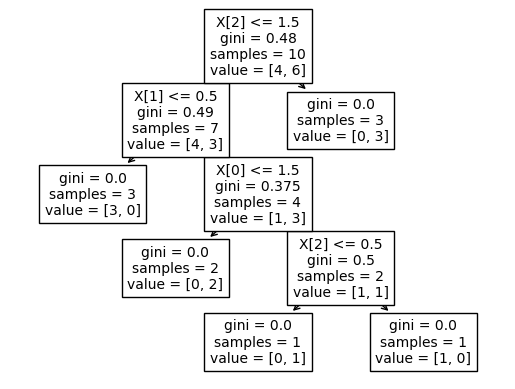

In [19]:
tree.plot_tree(model)

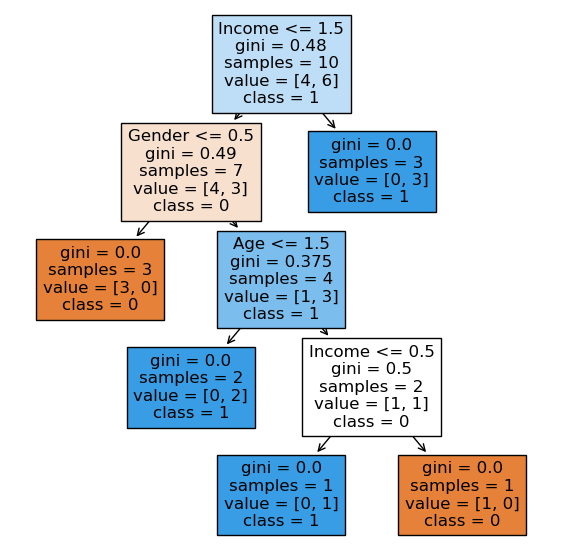

In [20]:
fig = plt.figure(figsize=(7,7))
h = tree.plot_tree(model,
                   feature_names = ['Age', 'Gender', 'Income'], class_names = ['0', '1'],
                   filled=True)
                   